<a href="https://colab.research.google.com/github/Kuldeep2003-exe/googleAi/blob/main/Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted output for x = 7.0: 69.38
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


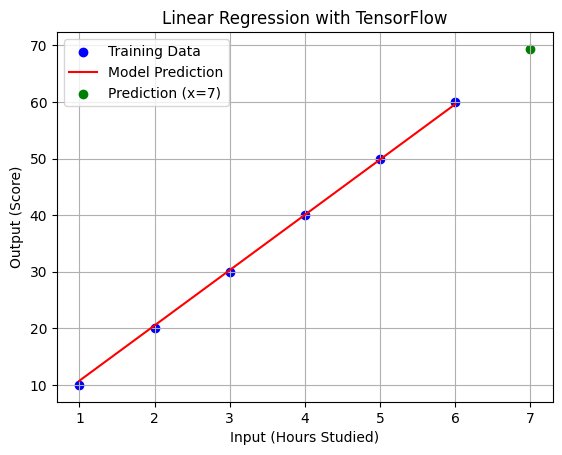

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 1. Create training data
# x (input): hours studied, y (output): score
x_train = np.array([1, 2, 3, 4, 5, 6], dtype=float)
y_train = np.array([10, 20, 30, 40, 50, 60], dtype=float)

# 2. Build a simple linear regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])  # y = wx + b
])

# 3. Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

# 4. Train the model
model.fit(x_train, y_train, epochs=200, verbose=0)

# 5. Make a prediction
x_test = 7.0  # For example: Predict score if student studies 7 hours
y_pred = model.predict(np.array([x_test]))
print(f"Predicted output for x = {x_test}: {y_pred[0][0]:.2f}")

# 6. Visualize
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.plot(x_train, model.predict(x_train), color='red', label='Model Prediction')
plt.scatter(x_test, y_pred, color='green', label='Prediction (x=7)')
plt.xlabel("Input (Hours Studied)")
plt.ylabel("Output (Score)")
plt.title("Linear Regression with TensorFlow")
plt.legend()
plt.grid(True)
plt.show()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.7679 - loss: 0.6422
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 30ms/step - accuracy: 0.8856 - loss: 0.3115
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9015 - loss: 0.2647
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9178 - loss: 0.2241
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9262 - loss: 0.1981
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9073 - loss: 0.2827

Test Accuracy: 90.58%
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


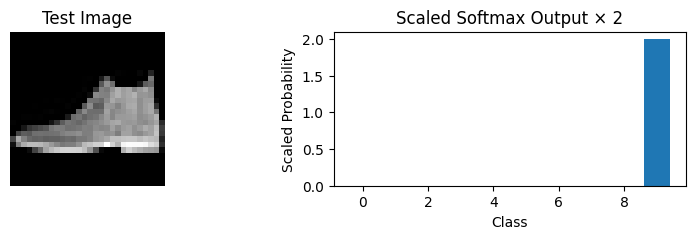

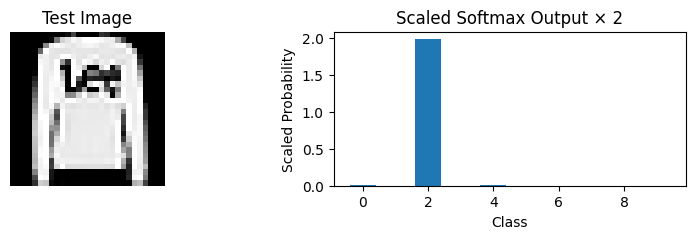

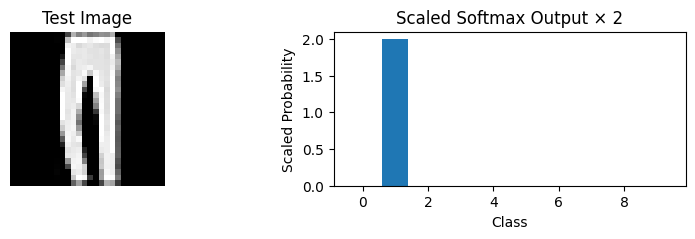

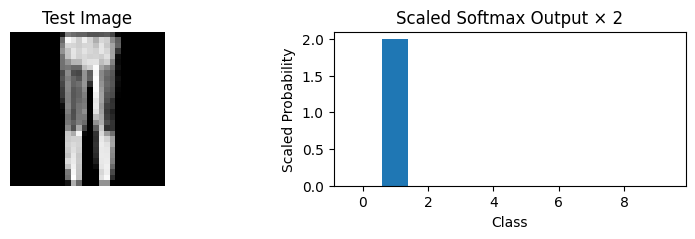

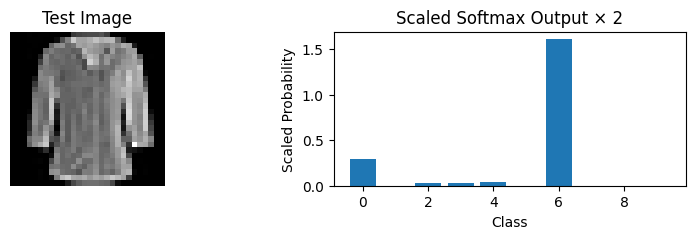

In [3]:
# Import required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape for CNN input
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Build the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)  # No activation yet, we'll scale logits manually
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

# Create softmax model wrapper for predictions
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

# Predict and scale outputs
predictions = probability_model.predict(test_images)

# Custom scaling: multiply softmax output by 2 (for demo purposes)
scaled_predictions = predictions * 2

# Visualize scaled outputs for first 5 test images
for i in range(5):
    plt.figure(figsize=(10, 2))
    plt.subplot(1, 2, 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title("Test Image")

    plt.subplot(1, 2, 2)
    plt.bar(range(10), scaled_predictions[i])
    plt.title("Scaled Softmax Output × 2")
    plt.xlabel("Class")
    plt.ylabel("Scaled Probability")
    plt.show()
